<a href="https://colab.research.google.com/github/sonudk/gittest/blob/master/Titanic_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Titanic Survival Regression
import numpy as np
import pandas as pd
import sklearn
import keras


In [0]:
dataset=pd.read_csv("titanic_data.csv")

In [8]:
dataset


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
dataset.shape

(891, 12)

In [10]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
type(dataset)

pandas.core.frame.DataFrame

In [49]:
print('Cabin')
dataset['Cabin'].value_counts() # what this does value_counts()
# ans: it return number of repetations in series

Cabin


C23 C25 C27        4
G6                 4
B96 B98            4
F2                 3
D                  3
E101               3
C22 C26            3
F33                3
B22                2
C65                2
D33                2
B20                2
B77                2
B5                 2
B57 B59 B63 B66    2
B49                2
E8                 2
C125               2
B58 B60            2
B51 B53 B55        2
D26                2
D17                2
F G73              2
C52                2
D20                2
E25                2
B18                2
E33                2
E24                2
F4                 2
                  ..
B94                1
B82 B84            1
C50                1
B38                1
B50                1
C95                1
A20                1
E77                1
C32                1
C86                1
A34                1
D19                1
C47                1
D45                1
E63                1
A16                1
A23          

In [52]:
print('Ticket')
dataset['Ticket'].value_counts()

Ticket


1601             7
347082           7
CA. 2343         7
3101295          6
347088           6
CA 2144          6
382652           5
S.O.C. 14879     5
113781           4
19950            4
2666             4
17421            4
PC 17757         4
113760           4
347077           4
349909           4
W./C. 6608       4
4133             4
LINE             4
PC 17572         3
110152           3
C.A. 31921       3
363291           3
C.A. 34651       3
35273            3
SC/Paris 2123    3
13502            3
347742           3
24160            3
F.C.C. 13529     3
                ..
4137             1
4134             1
14311            1
16988            1
36967            1
373450           1
370377           1
S.O.P. 1166      1
349209           1
348121           1
315151           1
347071           1
113800           1
4579             1
SC/PARIS 2149    1
347081           1
3474             1
34218            1
A/4. 39886       1
11752            1
350047           1
349223      

In [55]:
print('Sex')
dataset['Sex'].value_counts()

Sex


male      577
female    314
Name: Sex, dtype: int64

In [56]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [57]:
print('Embarked Value')
dataset['Embarked'].value_counts()

Embarked Value


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [58]:
X=pd.read_csv("train.csv")
Y=pd.read_csv("test.csv")
'''
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
'''


'\nimport sklearn\nfrom sklearn.model_selection import train_test_split\nX_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)\n'

In [60]:
X.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
import matplotlib.pyplot as plt


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0dea76a0b8>,
      dtype=object)

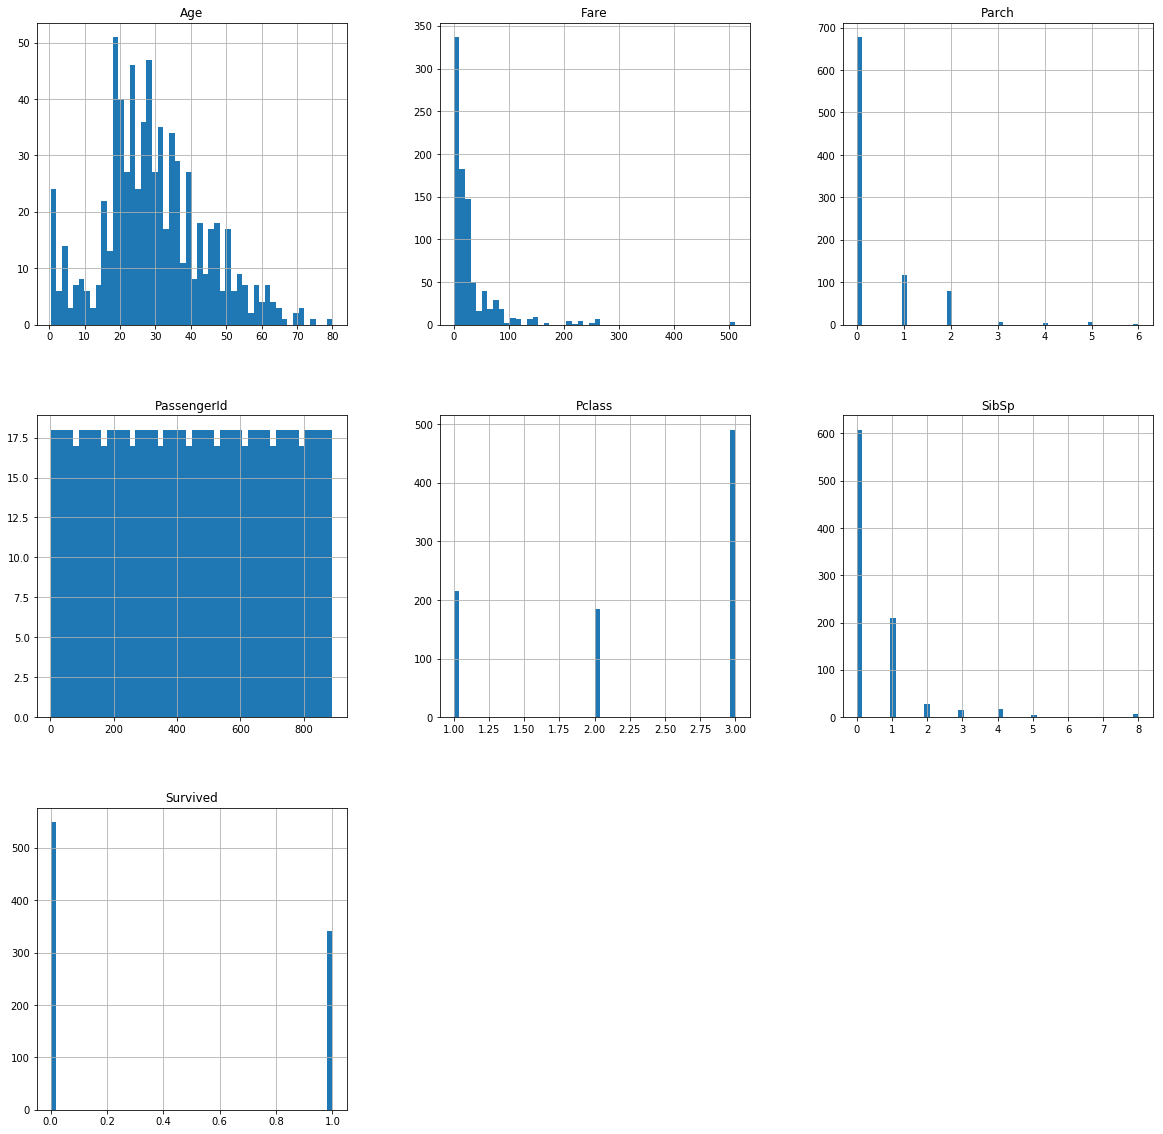

In [85]:
X.hist(bins=50,figsize=(20,20))

In [86]:
corr_matrix=X.corr()
print(corr_matrix['Survived'].sort_values(ascending=False))

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


In [87]:
print(np.amin(corr_matrix['Survived']))

-0.33848103596101586


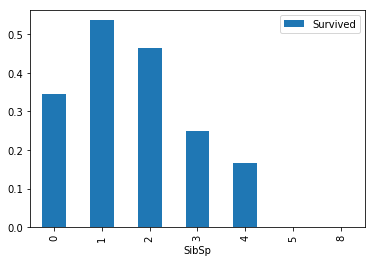

In [88]:
#plt.scatter('Fare','Survived')
siblins_plot=X.pivot_table(index='SibSp',values='Survived')
siblins_plot.plot.bar()


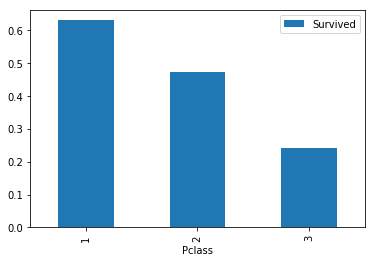

In [89]:
Pclass_plot=X.pivot_table(index='Pclass',values='Survived')
Pclass_plot.plot.bar()


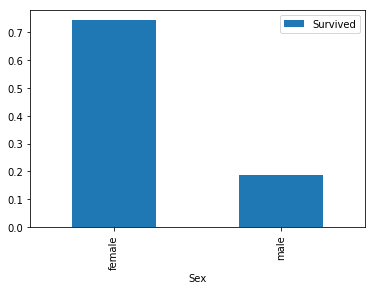

In [90]:
sex_plot=X.pivot_table(index='Sex',values='Survived')
sex_plot.plot.bar()


In [0]:
# what pivot_tabel does in above plots

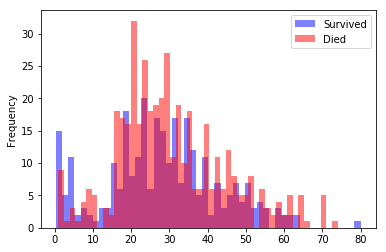

In [100]:
survived=X[X['Survived']==1]
died=X[X['Survived']==0]

survived['Age'].plot.hist(alpha=0.5,color='blue',bins=50)
died['Age'].plot.hist(alpha=0.5,color='red',bins=50)
plt.legend(['Survived','Died'])
plt.show()

In [108]:
# how this df and df.fillna and cut works exactly
# creating age categoris to make good things happen in our model
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]

X = process_age(X,cut_points,label_names)
Y = process_age(Y,cut_points,label_names)
X.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult


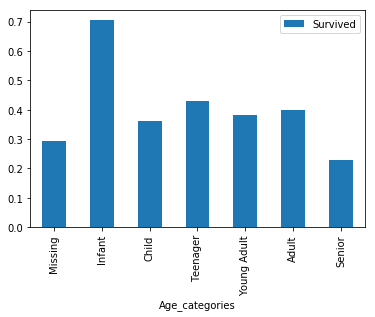

In [109]:
age_category_plot=X.pivot_table(index='Age_categories',values='Survived')
age_category_plot.plot.bar()